<a href="https://colab.research.google.com/github/justinsantacruz/MAT494/blob/main/SVM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
import imutils
import cv2
import sklearn

from sklearn.model_selection import train_test_split


mnist = datasets.load_digits()


(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
	mnist.target, test_size=0.25, random_state=42)

(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
	test_size=0.1, random_state=84)

print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 1212
validation data points: 135
testing data points: 450


In [2]:
from sklearn.svm import SVC
model = SVC(C=0.5,kernel='linear')
model.fit(trainData, trainLabels)
score = model.score(valData, valLabels)
print (score*100)

98.51851851851852


In [4]:
# test data
predictions = model.predict(testData)

print("EVALUATION ON TESTING DATA")
report = (classification_report(testLabels, predictions,output_dict=True)) # made the output of report as dictionary
print (report)

EVALUATION ON TESTING DATA
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 43}, '1': {'precision': 0.9487179487179487, 'recall': 1.0, 'f1-score': 0.9736842105263158, 'support': 37}, '2': {'precision': 0.9743589743589743, 'recall': 1.0, 'f1-score': 0.9870129870129869, 'support': 38}, '3': {'precision': 0.9777777777777777, 'recall': 0.9565217391304348, 'f1-score': 0.967032967032967, 'support': 46}, '4': {'precision': 0.9818181818181818, 'recall': 0.9818181818181818, 'f1-score': 0.9818181818181818, 'support': 55}, '5': {'precision': 0.9666666666666667, 'recall': 0.9830508474576272, 'f1-score': 0.9747899159663865, 'support': 59}, '6': {'precision': 0.9782608695652174, 'recall': 1.0, 'f1-score': 0.989010989010989, 'support': 45}, '7': {'precision': 1.0, 'recall': 0.975609756097561, 'f1-score': 0.9876543209876543, 'support': 41}, '8': {'precision': 1.0, 'recall': 0.9473684210526315, 'f1-score': 0.972972972972973, 'support': 38}, '9': {'precision': 0.9787234042553191, 'rec

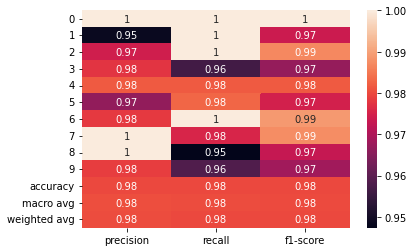

In [5]:
import seaborn as sns
import pandas as pd
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

I think that digit is: 4


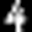

I think that digit is: 7


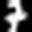

I think that digit is: 0


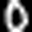

I think that digit is: 4


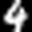

I think that digit is: 7


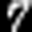

In [6]:
from google.colab.patches import cv2_imshow
for i in list(map(int, np.random.randint(0, high=len(testLabels), size=(5,)))):
	# grab the image and classify it
	image = testData[i]

	prediction = model.predict(image.reshape(1, -1))[0] 

	# convert the image for a 64-dim array to an 8 x 8 image compatible with OpenCV,
	# then resize it to 32 x 32 pixels so we can see it better
	image = image.reshape((8, 8)).astype("uint8")
	image = exposure.rescale_intensity(image, out_range=(0, 255))
	image = imutils.resize(image, width=32, inter=cv2.INTER_CUBIC)

	# show the prediction
	print("I think that digit is: {}".format(prediction))
	cv2_imshow(image)
